In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [166]:
dataframe = pd.read_csv('Descargas/fiuba-trocafone-tp1-final-set/events.csv')

In [195]:
dataframe['marca'], dataframe['modelo'] = dataframe['model'].str.split(' ',1).str
prod=dataframe[dataframe['event'] == 'conversion']
prod['marca'] = prod['marca'].apply(lambda marca: 'Apple' if (marca == 'iPhone' or marca == 'iPad') else marca)
marcas = prod['marca'].value_counts()
dataframe.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'marca', 'modelo', 'año',
       'mes', 'dia'],
      dtype='object')

Text(0,0.5,'Marca')

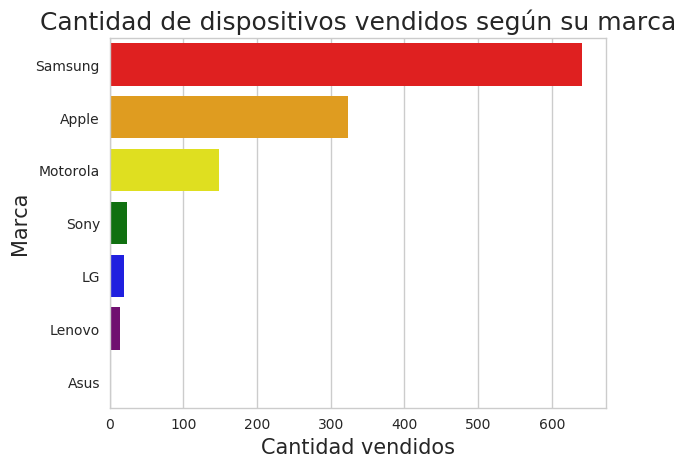

In [194]:
'''
Grafico de barras de ventas por marca de dispositivo.
'''
g = sns.barplot(x=marcas.values, y=marcas.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de dispositivos vendidos según su marca", fontsize=18)
g.set_xlabel("Cantidad vendidos", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0.5,0,'Modelo')

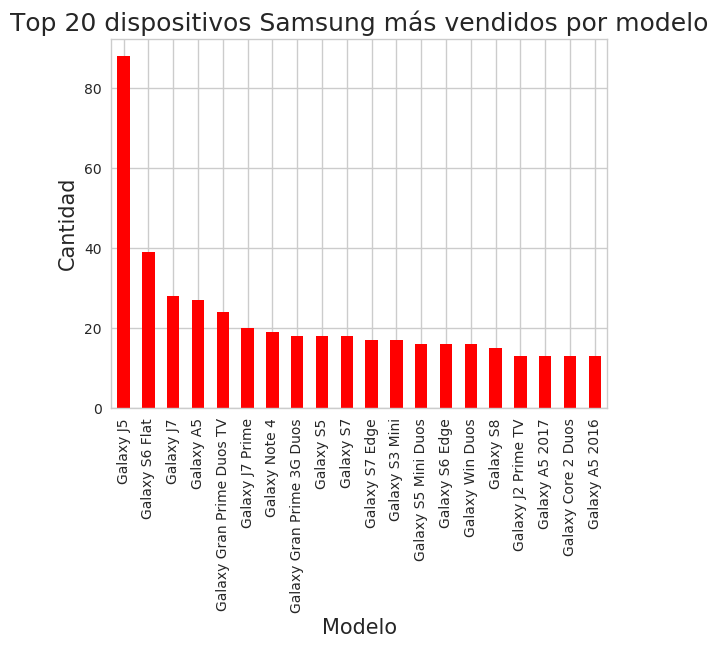

In [165]:
'''
Grafico de barras de top 20 dispositivos Samsung mas vendidos.
'''
SamsungVendidos = prod.loc[prod.marca == 'Samsung',:]['modelo'].value_counts().head(20)
SamsungVendidos

g = SamsungVendidos.plot.bar(color=['red'])
g.set_title("Top 20 dispositivos Samsung más vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

Text(0.5,0,'Modelo')

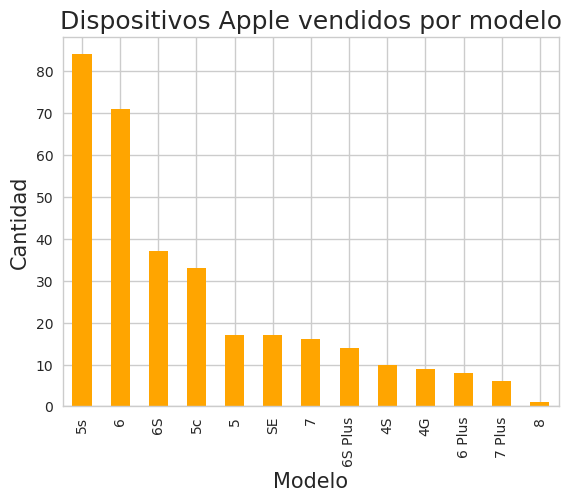

In [154]:
'''
Grafico de barras de dispositivos Apple mas vendidos.
'''

AppleVendidos = prod.loc[prod.marca == 'Apple',:]['modelo'].value_counts()
AppleVendidos

g = AppleVendidos.plot.bar(color=['orange'])
g.set_title("Dispositivos Apple vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

Text(0.5,0,'Modelo')

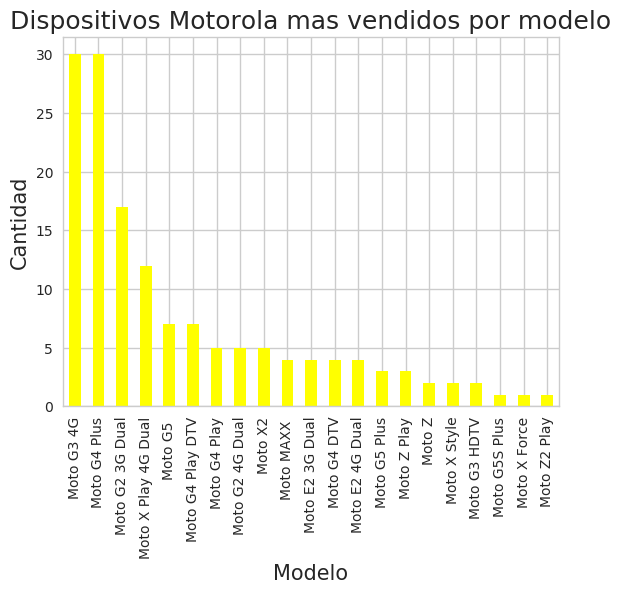

In [95]:
'''
Grafico de barras de dispositivos Motorola mas vendidos.
'''
MotorolaVendidos = prod.loc[prod.marca == 'Motorola',:]['modelo'].value_counts()
MotorolaVendidos

g = MotorolaVendidos.plot.bar(color=['yellow'])
g.set_title("Dispositivos Motorola por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

In [188]:
'''
Agego las columnas año, mes y dia.
'''
dataframe['año'],dataframe['mes'],dataframe['dia']= dataframe['timestamp'].str.split(' ').str[0].str.split('-').str